In [72]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


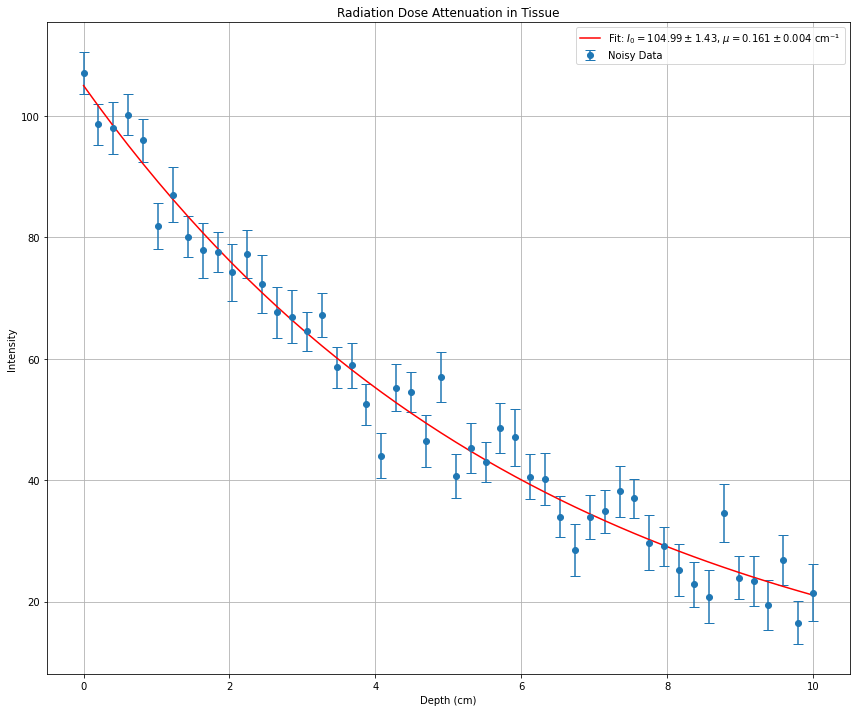

Fitted Parameters:
I0 = 104.99 ± 1.43
mu = 0.1606 ± 0.0040 cm^-1


In [85]:
# Beer-Lambert Law
def decay(x, I0, mu):
    return I0 * np.exp(-mu * x)

# Data
np.random.seed(0)
depth = np.linspace(0, 10, 50)  # cm
true_I0 = 100  # initial intensity
true_mu = 0.15  # cm^-1 for soft tissue
noise = 4

good_intensity = decay(depth, true_I0, true_mu)
noise = np.random.normal(0, noise_level, size=50)

# Noisy intensity
noisy_intensity = good_intensity + noise

noise_level = 4
intensity_uncertainty = noise_level * np.random.uniform(0.8, 1.2, size=depth.size)


# Fit the noisy data
popt, pcov = curve_fit(decay,depth, noisy_intensity, sigma=intensity_uncertainty, absolute_sigma=True)
I0_fit, mu_fit = popt
I0_err, mu_err = np.sqrt(np.diag(pcov))

# Calculate fit values
intensity_fit = exponential_model(depth, *popt)


# Soft Tissue
plt.figure(figsize=(12, 10))
plt.errorbar(depth, noisy_intensity, yerr=intensity_uncertainty, fmt='o', label='Noisy Data', capsize=5)
plt.plot(depth, intensity_fit, 'r-', label=f'Fit: $I_0={I0_fit:.2f} \pm {I0_err:.2f}$, $\\mu={mu_fit:.3f} \pm {mu_err:.3f}$ cm⁻¹')
plt.xlabel('Depth (cm)')
plt.ylabel('Intensity')
plt.title('Radiation Dose Attenuation in Tissue')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('dose_fit.png', dpi=300)
plt.show()

# Save the data
np.save('depth_cm.npy', depth)
np.save('noisy_intensity.npy', noisy_intensity)
np.save('intensity_uncertainty.npy', intensity_uncertainty)
np.save('intensity_fit.npy', intensity_fit)

# Print results
print("Fitted Parameters:")
print(f"I0 = {I0_fit:.2f} ± {I0_err:.2f}")
print(f"mu = {mu_fit:.4f} ± {mu_err:.4f} cm^-1")


In [74]:
print("I0:", popt[0])
print("mu:", popt[1])

I0: 104.98755954992075
mu: 0.16060467929578046


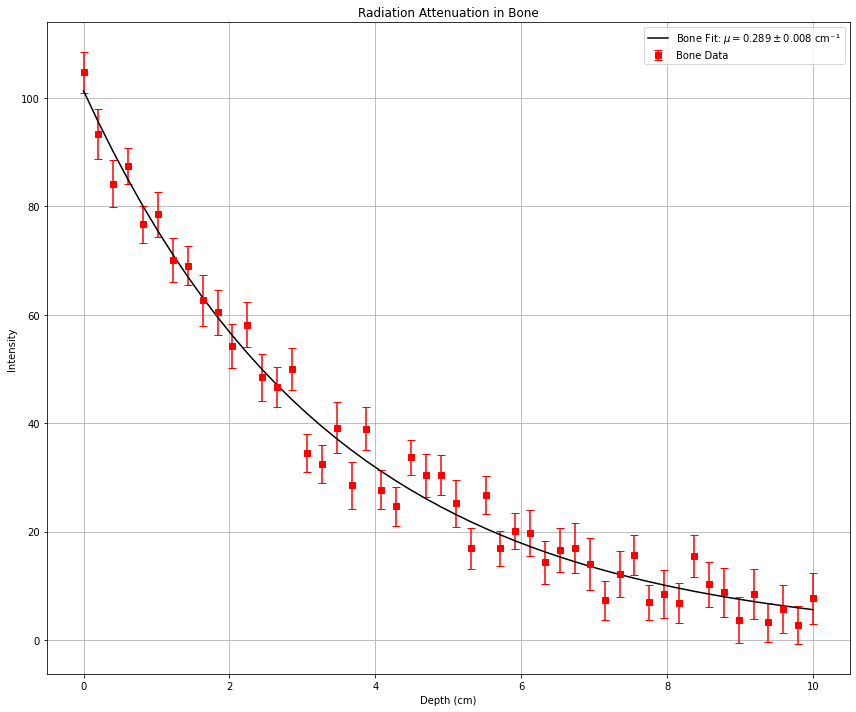

In [86]:
# Bone Simulation

# Bone Data
true_mu_bone = 0.30  # cm^-1
bone_clean = decay(depth, true_I0, true_mu_bone)

# Add noise to bone data
bone_noise = np.random.normal(0, noise_level, size=depth.size)
bone_noisy_intensity = bone_clean + bone_noise
bone_uncertainty = noise_level * np.random.uniform(0.8, 1.2, size=depth.size)

# Fit bone data
popt_bone, pcov_bone = curve_fit(decay,depth,bone_noisy_intensity,sigma=bone_uncertainty,absolute_sigma=True, bounds=([0, 0], [np.inf, 1.0]))
I0_bone_fit, mu_bone_fit = popt_bone
I0_bone_err, mu_bone_err = np.sqrt(np.diag(pcov_bone))
bone_fit = decay(depth, *popt_bone)

plt.figure(figsize=(12, 10))
plt.errorbar(depth, bone_noisy_intensity, yerr=bone_uncertainty, fmt='s', label='Bone Data', capsize=4, color="red")
plt.plot(depth, bone_fit, 'black', label=f'Bone Fit: $\\mu = {mu_bone_fit:.3f} \pm {mu_bone_err:.3f}$ cm⁻¹')
plt.xlabel('Depth (cm)')
plt.ylabel('Intensity')
plt.title('Radiation Attenuation in Bone')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [87]:
print(f"I0 = {I0_bone_fit:.2f} ± {I0_bone_err:.2f}")
print(f"mu = {mu_bone_fit:.4f} ± {mu_bone_err:.4f} cm^-1")

I0 = 101.32 ± 1.83
mu = 0.2891 ± 0.0078 cm^-1


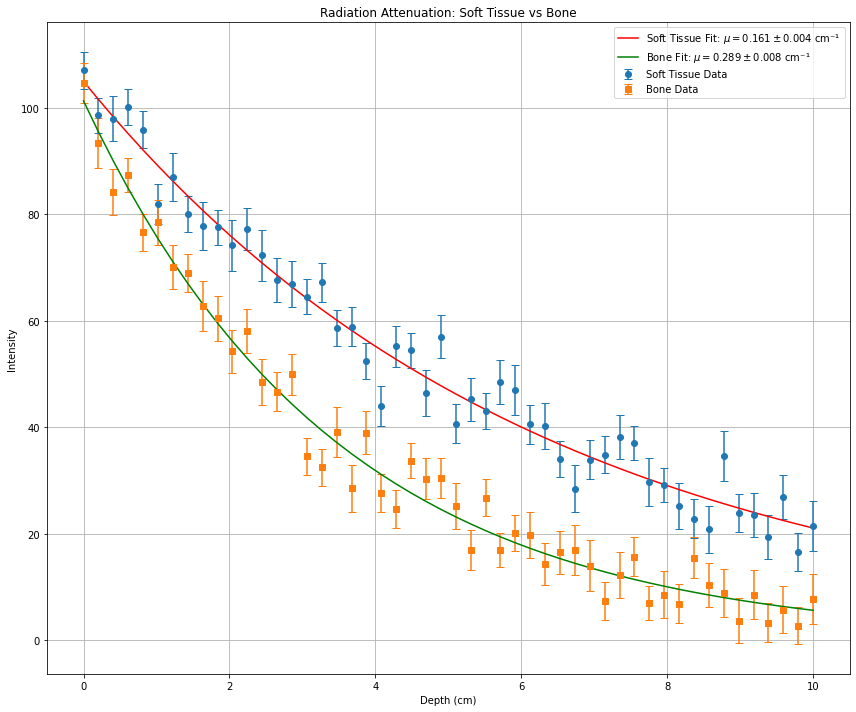

In [88]:
# Soft tissue and Bone
plt.figure(figsize=(12, 10))

# Soft tissue
plt.errorbar(depth, noisy_intensity, yerr=intensity_uncertainty, fmt='o', label='Soft Tissue Data', capsize=4)
plt.plot(depth, intensity_fit, 'r-', label=f'Soft Tissue Fit: $\\mu = {mu_fit:.3f} \pm {mu_err:.3f}$ cm⁻¹')

# Bone
plt.errorbar(depth, bone_noisy_intensity, yerr=bone_uncertainty, fmt='s', label='Bone Data', capsize=4)
plt.plot(depth, bone_fit, 'g', label=f'Bone Fit: $\\mu = {mu_bone_fit:.3f} \pm {mu_bone_err:.3f}$ cm⁻¹')

# Labels and legend
plt.xlabel('Depth (cm)')
plt.ylabel('Intensity')
plt.title('Radiation Attenuation: Soft Tissue vs Bone')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


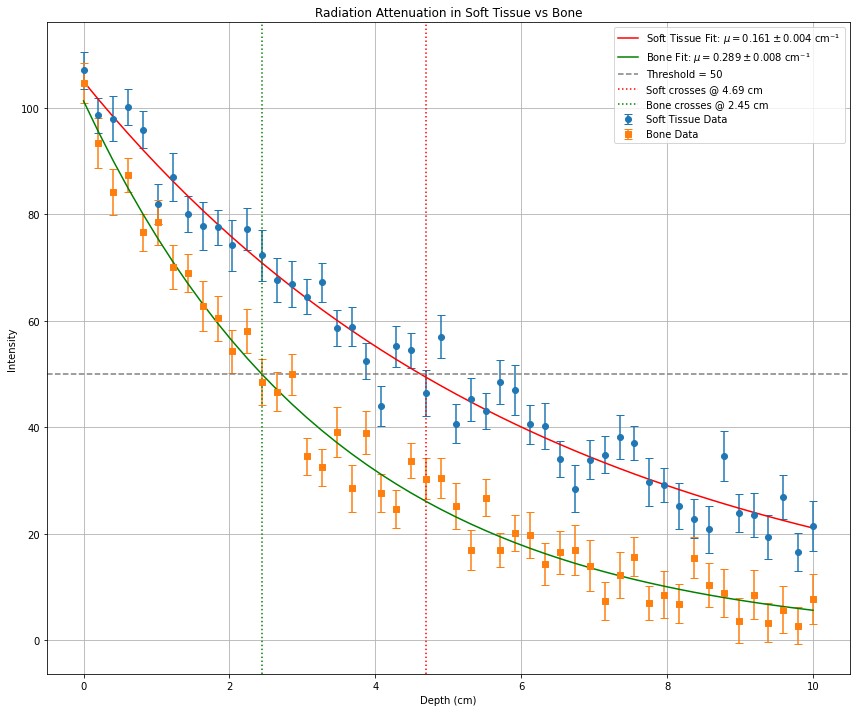

In [89]:
# Threshold intensity to mark
threshold_intensity = 50  # e.g., 25% of I0

# Find where each fit drops below the threshold
soft_index = np.argmax(intensity_fit < threshold_intensity)
bone_index = np.argmax(bone_fit < threshold_intensity)

soft_depth = depth[soft_index]
bone_depth = depth[bone_index]

# Plot
plt.figure(figsize=(12, 10))

# Plot noisy data and fits
plt.errorbar(depth, noisy_intensity, yerr=intensity_uncertainty, fmt='o', label='Soft Tissue Data', capsize=4)
plt.plot(depth, intensity_fit, 'r-', label=f'Soft Tissue Fit: $\\mu = {mu_fit:.3f} \pm {mu_err:.3f}$ cm⁻¹')

plt.errorbar(depth, bone_noisy_intensity, yerr=bone_uncertainty, fmt='s', label='Bone Data', capsize=4)
plt.plot(depth, bone_fit, 'g', label=f'Bone Fit: $\\mu = {mu_bone_fit:.3f} \pm {mu_bone_err:.3f}$ cm⁻¹')

# Add horizontal threshold line
plt.axhline(threshold_intensity, color='gray', linestyle='--', label=f'Threshold = {threshold_intensity}')

# Add vertical markers where each fit crosses the threshold
plt.axvline(soft_depth, color='red', linestyle=':', label=f'Soft crosses @ {soft_depth:.2f} cm')
plt.axvline(bone_depth, color='green', linestyle=':', label=f'Bone crosses @ {bone_depth:.2f} cm')

# Labels and formatting
plt.xlabel('Depth (cm)')
plt.ylabel('Intensity')
plt.title('Radiation Attenuation in Soft Tissue vs Bone')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [79]:
depth_loaded = np.load('depth_cm.npy')
noisy_intensity_loaded = np.load('noisy_intensity.npy')
intensity_uncertainty_loaded = np.load('intensity_uncertainty.npy')
intensity_fit_loaded = np.load('intensity_fit.npy')

In [80]:
print(depth_loaded)

[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]


In [81]:
print(depth)

[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]
